# Assignment 3 specification

The purpose of this assignment is to analyse the factors that might lead to (increased) consumption of both legal and illegal drugs. The data set is hosted on the UCI repository of datasets for machine learning.

The dataset is provided with this notebook as a zip file.

For your conveninece, code is provide below to read the data into the dataframe, and this notebook is setup so that students ar prompted to complete the tasks.


Students are asked to

1. Read the data and split it into training and test datasets. Perform 3-pass EDA on this data, to learn about its structure and to assess which features might be suitable for prediction. __[20 marks]__
2. For a decision tree classifier and any other classifier of your choosing, use the data description provided [here](https://archive.ics.uci.edu/dataset/373/drug+consumption+quantified) and the knowledge gained during EDA to find the best predictive model for the alcohol target, justifying the evaluation metric(s) you use. __[20 marks]__
   - When comparing between the classifiers, students should consider a wide range of classification metrics, not just one.
3. Use the same procedure as Task 2 to predict the following targets: caffeine, cocaine and heroin. Which "drug" (addictive substance) is the easiest to predict accurately, and why? __[25 marks]__
   - When comparing across the targets, students should consider a wide range of classification metrics, not just one.
4. Use hierarchical clustering to look for structural relationships within and between the features provided in the data. Hence, or otherwise, apply partitional clustering to the same data, discussing what groups of users have taken part in the drug consumption study. __[35 marks]__

# Here is some code to help you get started.

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import phik as phik
from sklearn.model_selection import train_test_split, cross_val_score
from ydata_profiling import ProfileReport #https://pypi.org/project/pandas-profiling/


%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import figure

sns.set_theme(palette="pastel")
sns.set_style('darkgrid')

In [26]:
#factors = ['neuroticism', 'extroversion', 'openness', 'agreeableness', 'conscientiousness', 'impulsivity', 'sensation', 'education', 'age', 'gender', 'country', 'ethnicity']
#targets = ['alcohol', 'amphetamines', 'amyl_nitrate', 'benzodiazepine', 'cannabis', 'chocolate', 'cocaine', 'caffeine', 'crack', 'ecstasy', 'heroin', 'ketamine', 'legal_highs', 'LSD', 'methadone', 'mushrooms', 'nicotine', 'semeron', 'volatile']
#colnames = factors
#colnames.extend(targets)

# Task 1: Read the data and split it into training and test datasets. Perform 3-pass EDA on this data, to learn about its structure and to assess which features might be suitable for prediction.

##Start of Answer 1##

In [27]:
drugDF = pd.read_csv('data/Drug_Consumption.csv', index_col=0)
drugDF = drugDF.reset_index(drop=True)
drugDF = drugDF.rename(columns={'Nscore':'Neuroticism','Escore':'Extraversion','Oscore':'Openness','Ascore':'Agreeableness','Cscore':'Conscientiousness','SS':'Sensation','Legalh':'Legal_High','Choc':'Chocolate'})
drugDF[['Age','Gender','Education','Country','Ethnicity','Alcohol','Amphet','Amyl','Benzos','Caff','Cannabis','Chocolate','Coke','Crack','Ecstasy','Heroin','Ketamine','Legal_High','LSD','Meth','Mushrooms','Nicotine','Semer','VSA']] = drugDF[['Age','Gender','Education','Country','Ethnicity','Alcohol','Amphet','Amyl','Benzos','Caff','Cannabis','Chocolate','Coke','Crack','Ecstasy','Heroin','Ketamine','Legal_High','LSD','Meth','Mushrooms','Nicotine','Semer','VSA']].apply(lambda x: x.astype('category'))

targets = drugDF[['Alcohol','Amphet','Amyl','Benzos','Caff','Cannabis','Chocolate','Coke','Crack','Ecstasy','Heroin','Ketamine','Legal_High','LSD','Meth','Mushrooms','Nicotine','Semer','VSA']]
features = drugDF.drop(columns={'Alcohol','Amphet','Amyl','Benzos','Caff','Cannabis','Chocolate','Coke','Crack','Ecstasy','Heroin','Ketamine','Legal_High','LSD','Meth','Mushrooms','Nicotine','Semer','VSA'})

print(f'Features:\n=========================================================\n{features.head(5)}')
print(f'\n\nTargets:\n=========================================================\n{targets.head(5)}')

Features:
     Age Gender                          Education Country Ethnicity  \
0  25-34      M                   Doctorate degree      UK     White   
1  35-44      M  Professional certificate/ diploma      UK     White   
2  18-24      F                     Masters degree      UK     White   
3  35-44      F                   Doctorate degree      UK     White   
4    65+      F            Left school at 18 years  Canada     White   

   Neuroticism  Extraversion  Openness   AScore  Conscientiousness  Impulsive  \
0     -0.67825       1.93886   1.43533  0.76096           -0.14277   -0.71126   
1     -0.46725       0.80523  -0.84732 -1.62090           -1.01450   -1.37983   
2     -0.14882      -0.80615  -0.01928  0.59042            0.58489   -1.37983   
3      0.73545      -1.63340  -0.45174 -0.30172            1.30612   -0.21712   
4     -0.67825      -0.30033  -1.55521  2.03972            1.63088   -1.37983   

   Sensation  
0   -0.21575  
1    0.40148  
2   -1.18084  
3   -0.215

In [29]:
X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size=0.2, random_state=176)
print(f'Training Data before validation split:\n\nX Training data: \n{X_train.shape, X_test.shape}\n\ny Training Data: \n {y_train.shape, y_test.shape}\n')

Training Data before validation split:

X Training data: 
((1507, 12), (377, 12))

y Training Data: 
 ((1507, 19), (377, 19))



In [31]:
trainingDF = X_train.join(y_train) #https://www.kdnuggets.com/2023/03/3-ways-merge-pandas-dataframes.html
trainingDF, validation = train_test_split(trainingDF, test_size=0.1)
profile = ProfileReport(trainingDF, title="Pandas Profiling Report - Training data")
trainingDF.profile_report()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [74]:
def createHeatmap(correlation):
    plt.figure(figsize=(17,17))
    heatmap = sns.heatmap(correlation, annot=True, square=True, fmt=".2f",linewidths=0.1, linecolor='white', vmin=1, vmax=-1)


interval columns not set, guessing: ['Neuroticism', 'Extraversion', 'Openness', 'AScore', 'Conscientiousness', 'Impulsive', 'Sensation']


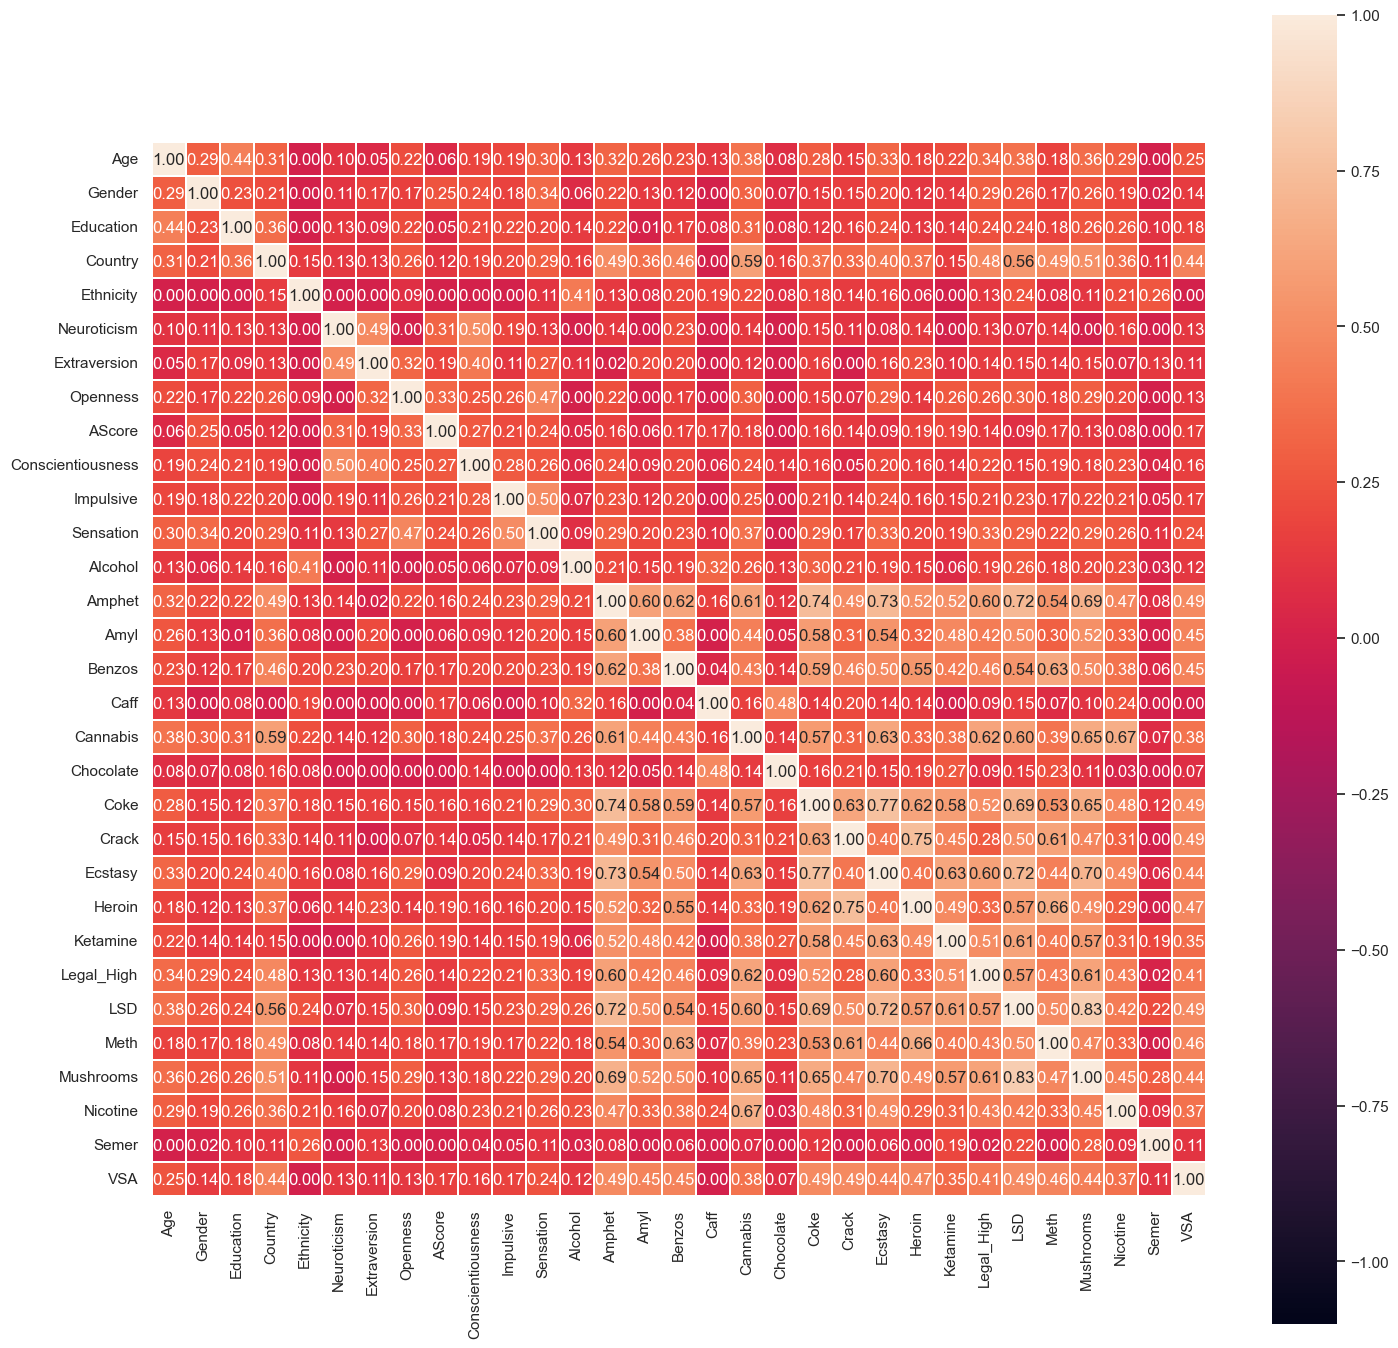

In [75]:
createHeatmap(trainingDF.phik_matrix())


### TODO
Add explanations to above cells</br>
Go through correlations -> remove anything below 0.5 for brevities' sake</br>
Explain the correlations

##End of Answer 1##

# Task 2: For a decision tree classifier and any other classifier of your choosing, use the data description provided [here](https://archive.ics.uci.edu/dataset/373/drug+consumption+quantified) and the knowledge gained during EDA to find the best predictive model for the alcohol target, justifying the evaluation metric(s) you use.

##Start of Answer 2##

##End of Answer 2##

# Task 3: Use the same procedure as Task 2 to predict the following targets: caffeine, cocaine and heroin. Which "drug" (addictive substance) is the easiest to predict accurately, and why?

##Start of Answer 3##

##End of Answer 3##

# Task 4: Use hierarchical clustering to look for structural relationships within and between the features provided in the data. Hence, or otherwise, apply partitional clustering to the same data, discussing what groups of users have taken part in the drug consumption study.

##Start of Answer 4##

##End of Answer 4##